In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'B:\Major_Git\Capstone-99acres\data\external\gurgaon_properties_cleaned_v2.csv').drop_duplicates()

c:\Users\ombha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


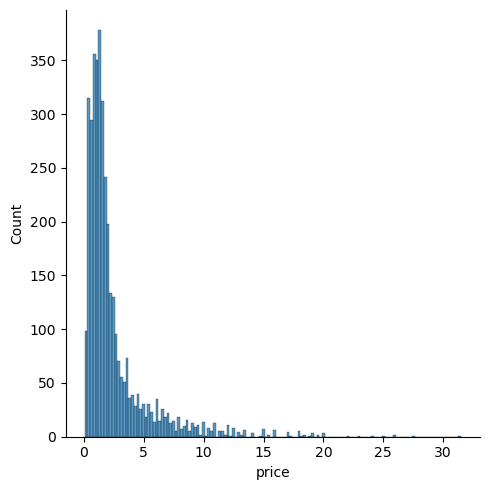

In [3]:
sns.displot(df['price'])

<Axes: xlabel='price'>

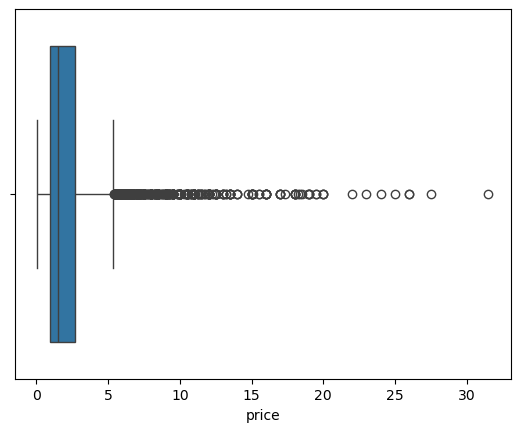

In [4]:
sns.boxplot(x=df['price'])

In [5]:
# Calculate the IQR for the Price column
Q1=df['price'].quantile(0.25)
Q3=df['price'].quantile(0.75)
IQR=Q3-Q1


lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outlier=df[(df['price']<lower_bound)|(df['price']>upper_bound)]

num_outlier=outlier.shape[0]

outlier_price_stats=outlier['price'].describe

num_outlier,outlier_price_stats

(439,
 <bound method NDFrame.describe of 14      17.30
 16       7.35
 18      12.00
 19      11.00
 21       6.75
         ...  
 3923     6.15
 3925     9.55
 3929     7.35
 3947     5.60
 3948    10.00
 Name: price, Length: 439, dtype: float64>)

## Price Per sqft

c:\Users\ombha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


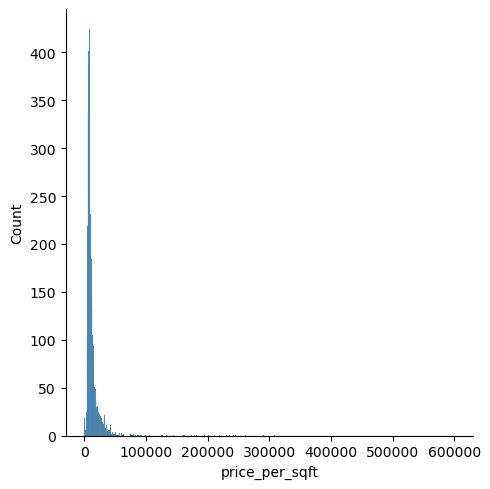

In [6]:
sns.displot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

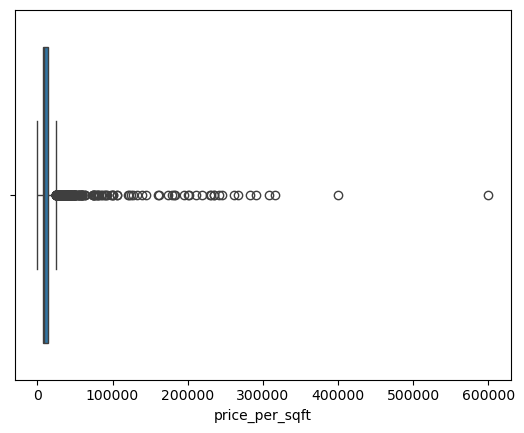

In [7]:
sns.boxplot(x=df['price_per_sqft'])

In [8]:
Q1=df['price_per_sqft'].quantile(0.25)
Q3=df['price_per_sqft'].quantile(0.75)

IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outlier_sqft=df[(df['price_per_sqft']<lower_bound)|(df['price_per_sqft']>upper_bound)]

num_outlier=outlier_sqft.shape[0]
num_outlier_stats=outlier_sqft['price_per_sqft'].describe()

#num_outlier,num_outlier_stats


ll={'original':df['price_per_sqft'].describe(),'outlier':outlier_sqft['price_per_sqft'].describe()}
print(ll)

{'original': count      3813.000000
mean      14012.019145
std       23344.201645
min           2.000000
25%        6806.000000
50%        9011.000000
75%       13875.000000
max      600000.000000
Name: price_per_sqft, dtype: float64, 'outlier': count       371.000000
mean      53737.811321
std       60660.260648
min       24489.000000
25%       28249.500000
50%       33951.000000
75%       43899.500000
max      600000.000000
Name: price_per_sqft, dtype: float64}


In [9]:
outlier_sqft['area']=outlier_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

C:\Users\ombha\AppData\Local\Temp\ipykernel_18100\146003548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_sqft['area']=outlier_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [10]:
outlier_sqft['price_per_sqft'] = round((outlier_sqft['price']*10000000)/outlier_sqft['area'])

C:\Users\ombha\AppData\Local\Temp\ipykernel_18100\58626075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_sqft['price_per_sqft'] = round((outlier_sqft['price']*10000000)/outlier_sqft['area'])


In [11]:
outlier_sqft['price_per_sqft'].describe()

count      371.000000
mean     28627.339623
std      12716.639019
min       2723.000000
25%      25000.000000
50%      29545.000000
75%      35443.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [12]:
df.update(outlier_sqft)

c:\Users\ombha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


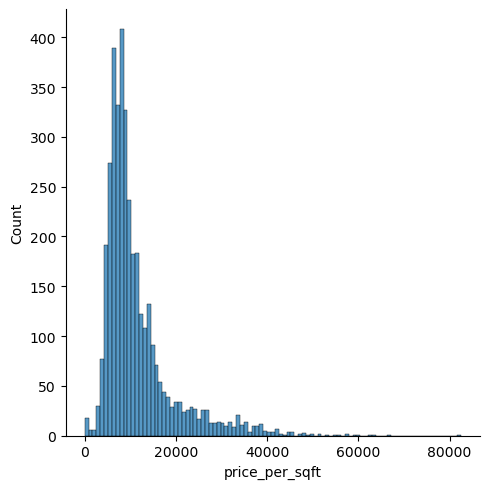

In [13]:
sns.displot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

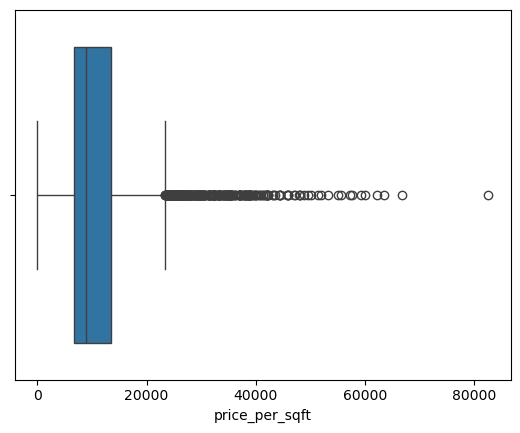

In [14]:
sns.boxplot(x=df['price_per_sqft'])

In [15]:
df=df[df['price_per_sqft']<=50000]

<Axes: xlabel='price_per_sqft'>

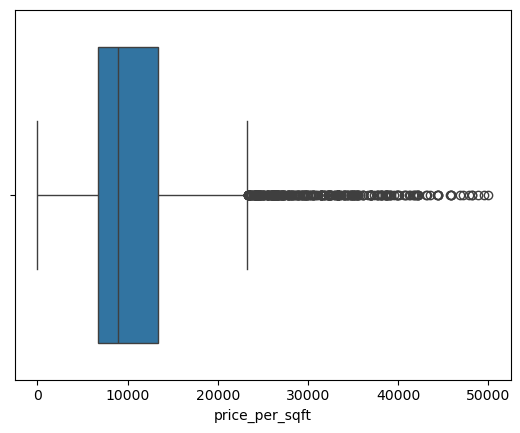

In [16]:
sns.boxplot(x=df['price_per_sqft'])

## Area

c:\Users\ombha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


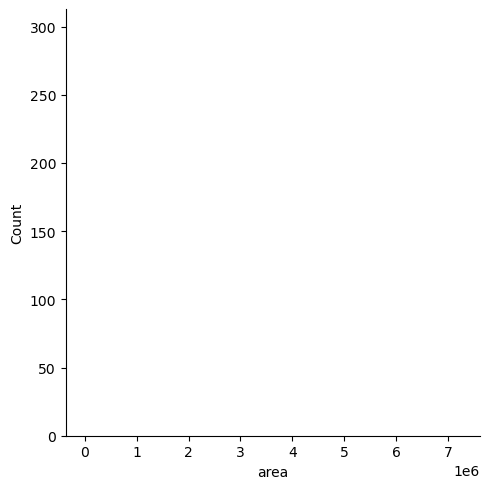

In [17]:
sns.displot(df['area'])

<Axes: xlabel='area'>

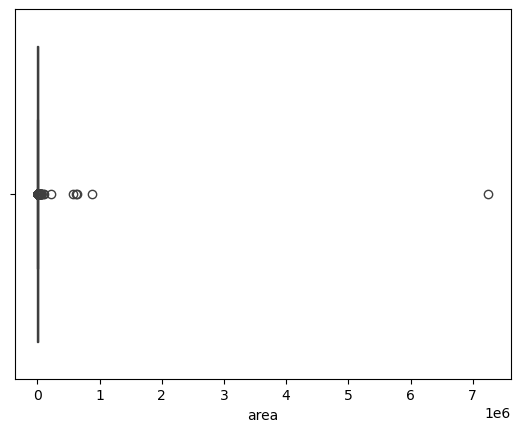

In [18]:
sns.boxplot(x=df['area'])

In [19]:
df['area'].describe()

count    3.800000e+03
mean     4.820859e+03
std      1.197452e+05
min      1.450000e+02
25%      1.245000e+03
50%      1.742500e+03
75%      2.340250e+03
max      7.250000e+06
Name: area, dtype: float64

In [20]:
df[df['area']>100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
486,house,independent,pataudi road,1.45,2.0,7250000.0,Plot area 200(809372 sq.m.),4,3,3+,...,NaN,200.0,NaN,0,0,0,0,0,1,0
2106,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,...,NaN,NaN,607936.0,1,0,0,0,1,1,65
2209,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,...,NaN,NaN,514396.0,0,0,0,0,0,1,44
2904,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,...,NaN,737147.0,NaN,0,0,0,0,0,2,44
3179,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,...,NaN,NaN,569243.0,0,0,0,0,0,1,76
3245,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,...,NaN,2.0,NaN,1,1,0,1,1,0,0


In [21]:
df = df[df['area'] < 100000]

C:\Users\ombha\AppData\Local\Temp\ipykernel_18100\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

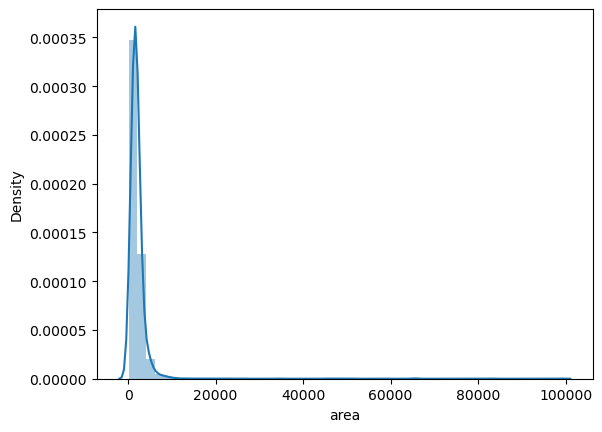

In [22]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

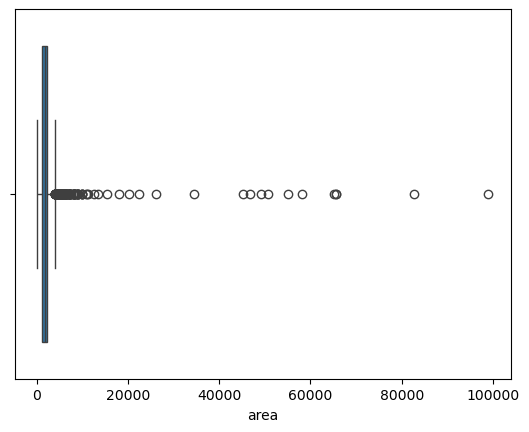

In [23]:
sns.boxplot(x=df['area'])

In [24]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
200,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,...,NaN,NaN,11000.00,0,1,1,1,0,0,60
426,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,...,NaN,115.0,NaN,0,0,0,0,1,1,7
696,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,...,NaN,NaN,64412.00,0,0,0,0,0,1,51
2679,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,...,NaN,NaN,64529.00,1,0,0,0,0,1,15
1397,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,...,NaN,NaN,7250.00,0,0,0,0,0,1,0
1962,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.00,0,0,0,0,0,1,15
1236,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,...,NaN,NaN,54917.00,0,0,0,0,0,1,37
646,house,independent,mayfield garden,5.50,1087.0,50598.0,Plot area 5620(4699.04 sq.m.)Built Up area: 82...,8,8,2,...,NaN,8260.0,4860.00,0,0,0,1,0,0,49
2274,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,...,NaN,NaN,48811.00,1,0,0,0,0,1,37
869,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,...,NaN,5800.0,5200.00,0,1,1,0,0,0,109


In [25]:
df.drop(index=[818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471], inplace=True)

In [26]:
df[df['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
200,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,...,NaN,NaN,11000.00,0,1,1,1,0,0,60
426,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,...,NaN,115.0,NaN,0,0,0,0,1,1,7
696,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,...,NaN,NaN,64412.00,0,0,0,0,0,1,51
2679,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,...,NaN,NaN,64529.00,1,0,0,0,0,1,15
1397,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,...,NaN,NaN,7250.00,0,0,0,0,0,1,0
1962,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.00,0,0,0,0,0,1,15
1236,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,...,NaN,NaN,54917.00,0,0,0,0,0,1,37
646,house,independent,mayfield garden,5.50,1087.0,50598.0,Plot area 5620(4699.04 sq.m.)Built Up area: 82...,8,8,2,...,NaN,8260.0,4860.00,0,0,0,1,0,0,49
2274,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,...,NaN,NaN,48811.00,1,0,0,0,0,1,37
869,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,...,NaN,5800.0,5200.00,0,1,1,0,0,0,109


In [27]:
df.loc[48,'area'] = 115*9
df.loc[300,'area'] = 7250
df.loc[2666,'area'] = 5800
df.loc[1358,'area'] = 2660
df.loc[3195,'area'] = 2850
df.loc[2131,'area'] = 1812
df.loc[3088,'area'] = 2160
df.loc[3444,'area'] = 1175

C:\Users\ombha\AppData\Local\Temp\ipykernel_18100\91062565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


<Axes: xlabel='area', ylabel='Density'>

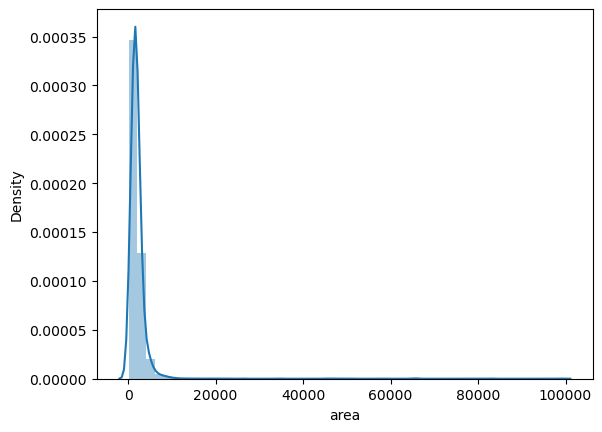

In [28]:
sns.distplot(df['area'])

<Axes: xlabel='area'>

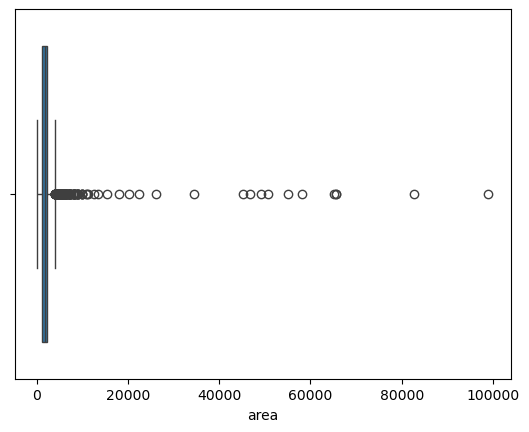

In [29]:
sns.boxplot(x=df['area'])

## Bedroom


c:\Users\ombha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


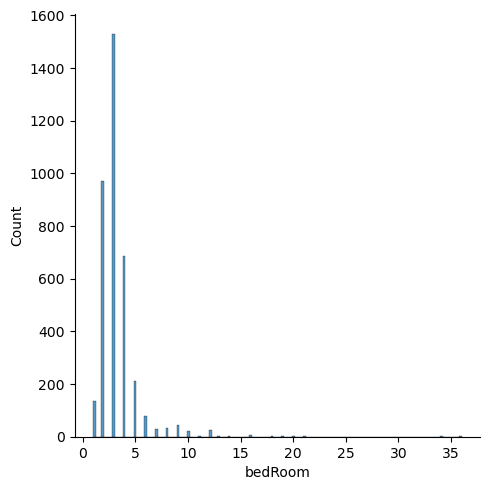

In [30]:
sns.displot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

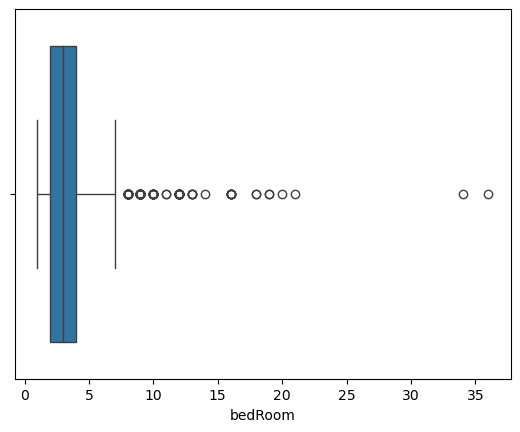

In [31]:
sns.boxplot(x=df['bedRoom'])

In [32]:
df['bedRoom'].describe()

count    3785.000000
mean        3.357464
std         1.974156
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        36.000000
Name: bedRoom, dtype: float64

In [33]:
df[df['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
452,house,independent,west sector 13,2.25,6944.0,3240.0,Plot area 360(301.01 sq.m.),36,36,2,...,NaN,360.0,NaN,0,1,0,0,0,1,7
1656,house,manohar nagar,manohar nagar,5.60,12444.0,4500.0,Plot area 500(418.06 sq.m.)Built Up area: 500 ...,34,34,3+,...,NaN,500.0,NaN,0,0,0,0,0,0,0
1760,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,...,NaN,129.0,NaN,0,1,0,0,0,2,49
968,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,...,NaN,128.0,NaN,0,1,0,0,0,2,22
2497,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19,17,3+,...,NaN,7500.0,NaN,1,0,1,0,0,1,68
1480,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,...,NaN,1622.0,NaN,1,1,1,1,0,1,74
2854,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,...,NaN,160.0,NaN,0,1,0,0,0,2,70
2870,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18,18,3+,...,NaN,167.0,NaN,0,0,0,0,1,2,57
1608,house,independent,sector 55,9.19,34037.0,2700.0,Plot area 300(250.84 sq.m.),16,18,2,...,NaN,300.0,NaN,0,1,0,1,0,0,49
1427,house,independent,sector 56,12.39,45889.0,2700.0,Plot area 300(250.84 sq.m.),16,18,3+,...,NaN,300.0,NaN,0,1,0,1,0,0,49


In [34]:
df = df[df['bedRoom'] <= 10]

c:\Users\ombha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


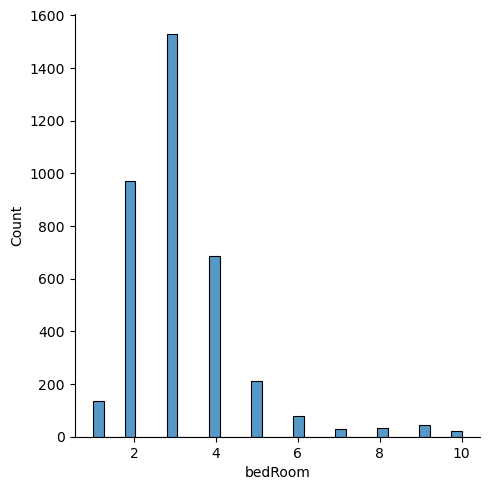

In [36]:
sns.displot(df['bedRoom'])

<Axes: xlabel='bedRoom'>

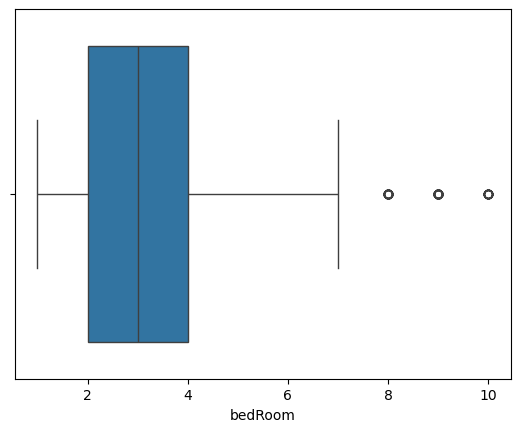

In [37]:
sns.boxplot(x=df['bedRoom'])

## Bathroom

c:\Users\ombha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


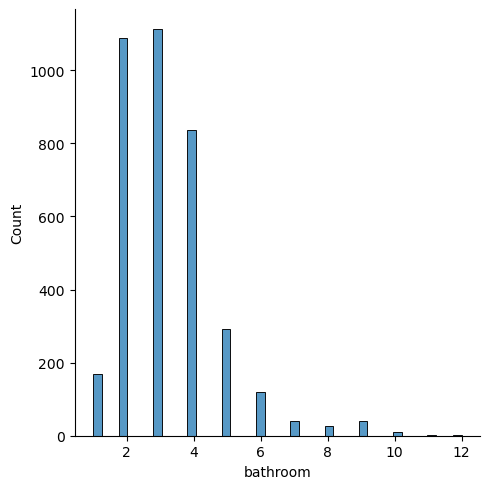

In [38]:
sns.displot(df['bathroom'])

<Axes: xlabel='bathroom'>

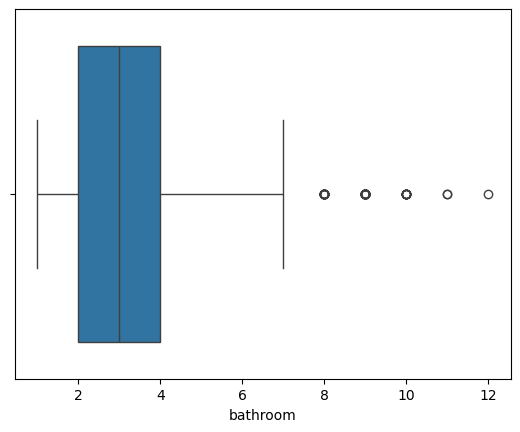

In [39]:
sns.boxplot(x=df['bathroom'])

In [40]:
df[df['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1892,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,...,NaN,6390.0,NaN,0,1,0,0,0,0,146
1852,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,...,NaN,7000.0,NaN,0,0,0,1,0,2,38
3782,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,...,NaN,5000.0,NaN,1,1,0,1,1,0,39


## Super BUild Up Area

c:\Users\ombha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


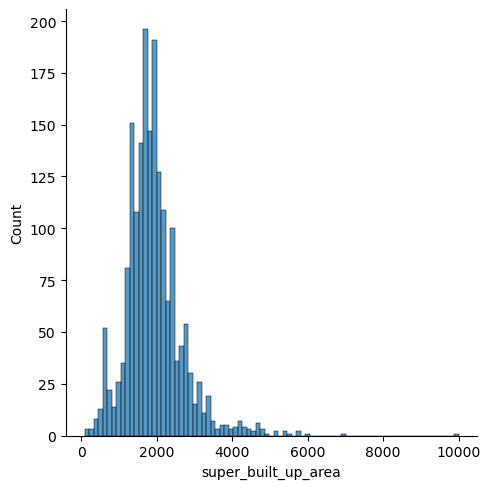

In [41]:
sns.displot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

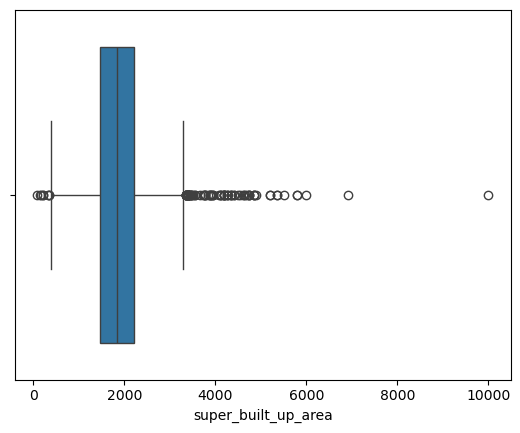

In [42]:
sns.boxplot(x=df['super_built_up_area'])

In [43]:
df['super_built_up_area'].describe()

count     1889.000000
mean      1921.802303
std        765.756515
min         89.000000
25%       1470.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [44]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
948,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,...,10000.0,NaN,NaN,0,1,0,1,1,1,49
3258,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,...,6926.0,NaN,NaN,0,1,0,0,0,0,140


## Build UP Area

c:\Users\ombha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


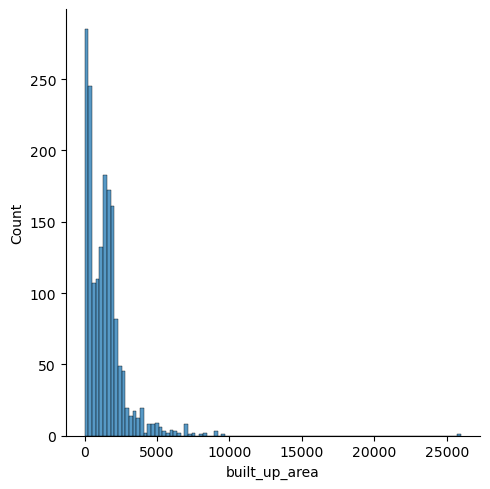

In [45]:
sns.displot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

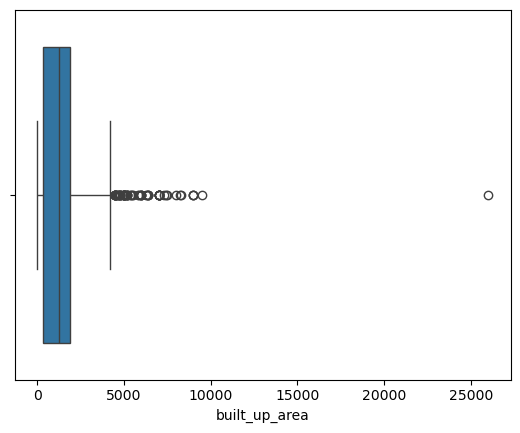

In [46]:
sns.boxplot(x=df['built_up_area'])

In [47]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
585,house,independent,sector 3 phase i,1.45,557.0,26032.0,Plot area 26000(2415.48 sq.m.),4,4,2,...,NaN,26000.0,NaN,0,1,0,1,0,1,62


## Carpet Area

c:\Users\ombha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


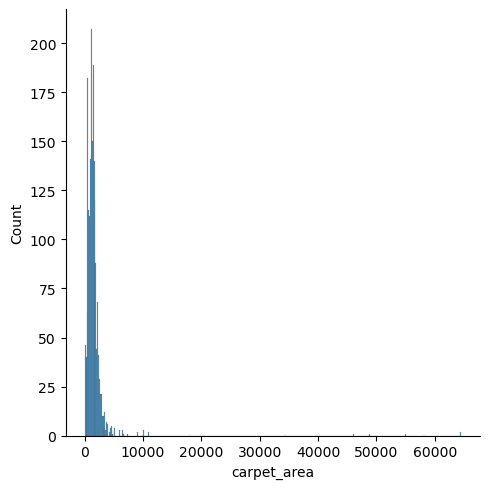

In [49]:
sns.displot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

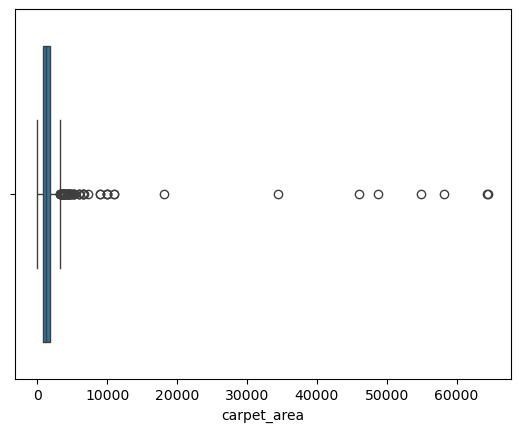

In [50]:
sns.boxplot(x=df['carpet_area'])

In [51]:
df[df['carpet_area'] > 10000]


,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
200,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,...,NaN,NaN,11000.0,0,1,1,1,0,0,60
696,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,...,NaN,NaN,64412.0,0,0,0,0,0,1,51
1028,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,...,NaN,NaN,45966.0,0,0,0,0,1,1,33
1059,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,...,NaN,NaN,18122.0,1,0,0,1,1,0,44
1236,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,...,NaN,NaN,54917.0,0,0,0,0,0,1,37
1962,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,1,15
2274,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,...,NaN,NaN,48811.0,1,0,0,0,0,1,37
2311,flat,rof ananda,sector 95,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1,1,1,...,NaN,NaN,34401.0,0,0,0,0,0,1,68
2679,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,...,NaN,NaN,64529.0,1,0,0,0,0,1,15
2707,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,...,NaN,NaN,11000.0,0,1,0,0,0,1,60


In [52]:
df.loc[2131,'carpet_area'] = 1812

In [53]:
df[df['carpet_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
200,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,...,NaN,NaN,11000.0,0,1,1,1,0,0,60
696,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,...,NaN,NaN,64412.0,0,0,0,0,0,1,51
1028,flat,ramsons kshitij,sector 95,0.24,53.0,45283.0,Carpet area: 45966 (4270.38 sq.m.),2,2,1,...,NaN,NaN,45966.0,0,0,0,0,1,1,33
1059,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,...,NaN,NaN,18122.0,1,0,0,1,1,0,44
1236,flat,rof ananda,sector 95,0.33,60.0,55000.0,Carpet area: 54917 (5101.96 sq.m.),2,2,1,...,NaN,NaN,54917.0,0,0,0,0,0,1,37
1962,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,1,15
2274,flat,signature the serenas,sohna road,0.28,57.0,49123.0,Carpet area: 48811 (4534.69 sq.m.),1,1,2,...,NaN,NaN,48811.0,1,0,0,0,0,1,37
2311,flat,rof ananda,sector 95,0.21,61.0,34426.0,Carpet area: 34401 (3195.96 sq.m.),1,1,1,...,NaN,NaN,34401.0,0,0,0,0,0,1,68
2679,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,...,NaN,NaN,64529.0,1,0,0,0,0,1,15
2707,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,...,NaN,NaN,11000.0,0,1,0,0,0,1,60


c:\Users\ombha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


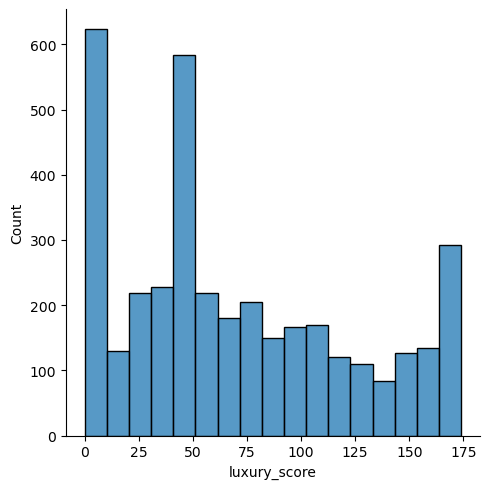

In [54]:
sns.displot(df['luxury_score'])

<Axes: ylabel='luxury_score'>

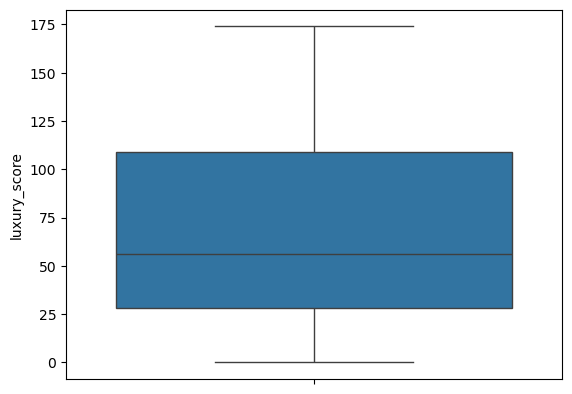

In [55]:
sns.boxplot(df['luxury_score'])

In [56]:
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

c:\Users\ombha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


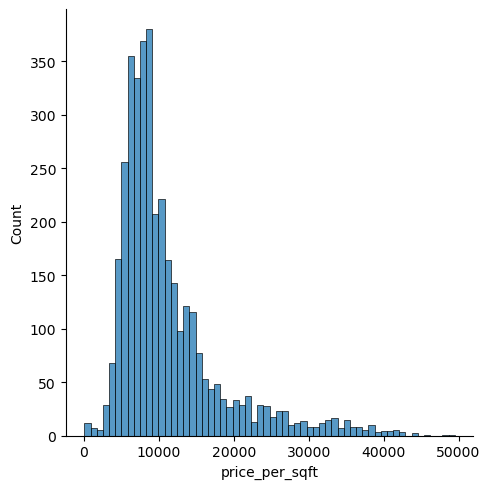

In [57]:
sns.displot(df['price_per_sqft'])

<Axes: ylabel='price_per_sqft'>

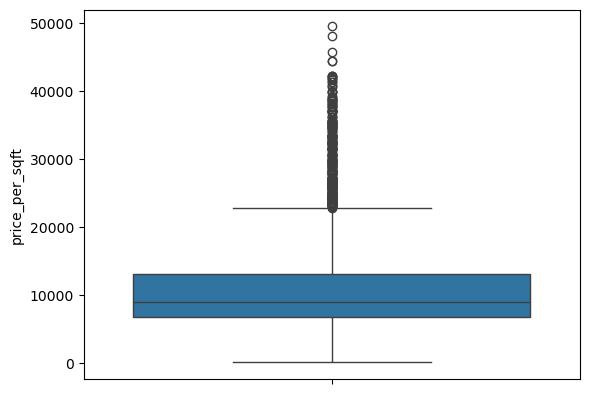

In [58]:
sns.boxplot(df['price_per_sqft'])

In [59]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
18,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4,5,3+,...,NaN,316.0,NaN,0,1,1,1,0,0,60
252,house,independent,sector 25,13.0,45710.0,2844.0,Plot area 316(264.22 sq.m.),6,8,3+,...,NaN,316.0,NaN,1,1,1,1,0,2,0
509,house,independent,sector 105,9.9,49500.0,2000.0,Built Up area: 2000 (185.81 sq.m.)Carpet area:...,2,2,2,...,NaN,2000.0,1800.0,0,0,0,0,0,1,0
675,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,...,NaN,500.0,NaN,0,1,0,1,0,2,97
1051,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,...,NaN,115.0,100.0,0,0,0,0,1,0,44
1079,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5,5,3+,...,NaN,300.0,250.0,0,1,0,1,0,0,88
2201,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6,8,3+,...,NaN,500.0,NaN,1,1,1,1,0,0,103
2950,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6,6,3,...,NaN,502.0,NaN,1,1,0,0,0,0,121
3376,house,sushant lok 1 builder floors,sector 43,13.0,48148.0,2700.0,Plot area 300(250.84 sq.m.),3,3,3+,...,NaN,300.0,NaN,0,0,0,1,0,0,7


In [60]:
x = df[df['price_per_sqft'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.02)

170.84

In [61]:
df[(df['area']/df['bedRoom'])<183]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
11,house,rajendra park gurgaon,sector 105,0.37,10278.0,360.0,Plot area 360(33.45 sq.m.),4,3,2,...,NaN,360.0,NaN,0,0,0,0,0,1,0
37,house,independent,sector 2,3.65,23443.0,1557.0,Plot area 173(144.65 sq.m.),9,9,3+,...,NaN,173.0,NaN,0,1,0,1,0,0,116
38,house,not applicable,sector 4,0.51,14167.0,360.0,Plot area 40(33.45 sq.m.),4,4,3,...,NaN,40.0,NaN,0,0,0,0,0,1,0
71,house,shri shyam residency,sector 104,0.62,12400.0,500.0,Plot area 500(46.45 sq.m.)Built Up area: 900 s...,3,3,1,...,NaN,900.0,480.0,0,0,0,0,1,2,8
111,house,independent,sector 21,0.45,8411.0,535.0,Carpet area: 535 (49.7 sq.m.),3,2,1,...,NaN,NaN,535.0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3884,house,independent,khandsa,0.45,10090.0,446.0,Plot area 446(41.43 sq.m.),5,3,2,...,NaN,446.0,NaN,0,0,0,0,0,1,0
3907,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6,2,3,...,NaN,NaN,1000.0,0,0,0,0,0,1,0
3908,house,independent,surat nagar,0.71,10143.0,700.0,Plot area 700(65.03 sq.m.),4,2,1,...,NaN,700.0,NaN,0,0,0,0,0,1,0
3921,house,independent,sector 4,1.10,11111.0,990.0,Built Up area: 990 (91.97 sq.m.),6,4,1,...,NaN,990.0,NaN,0,0,0,0,0,1,0


In [62]:
df.to_csv('B:\Major_Git\Capstone-99acres\data\external\outlier_treated.csv',index=False)